In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving lawn_reviews.xlsx to lawn_reviews.xlsx
Saving lawn_stars.xlsx to lawn_stars.xlsx
Saving ps5_reviews.xlsx to ps5_reviews.xlsx
Saving ps5_stars.xlsx to ps5_stars.xlsx


{'lawn_reviews.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x9c&|W\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00_rels/.rels\xad\x92\xc1N\xc30\x0c\x86\xef{\x8a*\xf75\xdd@\x08\xa1\xa6\xbbLH\xbb!4\x1e\xc0$n\x1b\xb5\x89\xa3\xc4\x83\xf2\xf6D\x13\x12\x0c\x8d\xb2\xc3\x8eq~\x7f\xfeb\xa5\xdeLn,\xde0&K^\x89UY\x89\x02\xbd&c}\xa7\xc4\xcb\xfeqy/6\xcd\xa2~\xc6\x118GRoC*r\x8fOJ\xf4\xcc\xe1A\xca\xa4{t\x90J\n\xe8\xf3MK\xd1\x01\xe7c\xecd\x00=@\x87r]Uw2\xfed\x88\xe6\x84Y\xec\x8c\x12qgV\xa2\xd8\x7f\x04\xbc\x84Mmk5nI\x1f\x1cz>3\xe2W"\x93!v\xc8JL\xa3|\xa78\xbc\x12\re\x86\ny\xdee}\xb9\xcb\xdf\xef\x94\x0e\x19\x0c0HM\x11\x97!\xe6\xee\xc8\x16\xd3\xb7\x8e!\xfd\x94\xcb\xe9\x98\x98\x13\xba\xb9\xe6rpb\xf4\x06\xcd\xbc\x12\x840gt{M#}HL\xee\x9f\x15\x1d3_J\x8bZ\x9e\xfc\xcb\xe6\x13PK\x07\x08\x85\x9a4\x9a\xee\x00\x00\x00\xce\x02\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00\x9c&|W\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x00\x00\x00xl/workbook.xml\x8dS\xdbr\xda0\x10}\xefWx\xf4\x0e\xbep)0\x98\x0c5x

In [ ]:
lawn_r = pd.read_excel('lawn_reviews.xlsx')
lawn_s = pd.read_excel('lawn_stars.xlsx')

In [ ]:
lawn = pd.concat([lawn_r, lawn_s], axis=1)

In [ ]:
lawn.head()

,Reviews,Stars
0,So here’s my experience.1. I followed the dire...,3.0 out of 5 stars
1,This is not a good product! As usual with as-s...,2.0 out of 5 stars
2,"So, I bought this based on the videos that the...",2.0 out of 5 stars
3,Purchased for Central Florida in JuneIt has be...,3.0 out of 5 stars
4,I was not very happy with this product. You wi...,3.0 out of 5 stars


In [ ]:
# add 'ID' column to give each review an ID

id = list(range(1, len(lawn)+1))

lawn.insert(0, "ID", id)
lawn.head()

,ID,Reviews,Stars
0,1,So here’s my experience.1. I followed the dire...,3.0 out of 5 stars
1,2,This is not a good product! As usual with as-s...,2.0 out of 5 stars
2,3,"So, I bought this based on the videos that the...",2.0 out of 5 stars
3,4,Purchased for Central Florida in JuneIt has be...,3.0 out of 5 stars
4,5,I was not very happy with this product. You wi...,3.0 out of 5 stars


In [ ]:
#converting 'Stars' score to number format

sz = len(lawn)

for i in range(sz):
  lawn['Stars'][i] = float(lawn['Stars'][i][:3])


In [ ]:
lawn.head()

,ID,Reviews,Stars
0,1,So here’s my experience.1. I followed the dire...,3.0
1,2,This is not a good product! As usual with as-s...,2.0
2,3,"So, I bought this based on the videos that the...",2.0
3,4,Purchased for Central Florida in JuneIt has be...,3.0
4,5,I was not very happy with this product. You wi...,3.0


In [ ]:
ex = lawn['Reviews'].values[1]
ex

'This is not a good product! As usual with as-seen-on-tv garbage, overpriced and under-performing. But I believe in specifics when I review something so let’s get to it. I purchased this as a skeptic but, since I had soooooo much yard to regrow, I decided to give it a try. I figured if it worked, awesome! And, if it didn\'t I would waste $25 and then move on to more expensive or involved methods. Now, I followed the directions to the letter and within the week (I sprayed on Sunday and began to see results on Wednesday) there was, in-deed, grass growing on my formerly barren yard. However, this product is far from the miracle it espouses itself to be. Here are some specific thoughts...Calling this product a “Mousse” is just inaccurate. It doesn\'t create any kind of "stick anywhere gel". I have a mostly flat yard, so this was not an issue for me. But, the little slope I have in the corner saw a flow of blue/green liquid streaming down.The little vial of liquid featured in the commercial

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
#Run Vaders polarity score on the entire dataset
res = {}

for i, row in tqdm(lawn.iterrows(), total=len(lawn)):
  text = row['Reviews']
  stars = row['Stars']
  id = row['ID']
  res[id] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.038, 'neu': 0.874, 'pos': 0.088, 'compound': 0.9115},
 2: {'neg': 0.029, 'neu': 0.886, 'pos': 0.085, 'compound': 0.9925},
 3: {'neg': 0.095, 'neu': 0.854, 'pos': 0.051, 'compound': -0.9545},
 4: {'neg': 0.044, 'neu': 0.876, 'pos': 0.081, 'compound': 0.8765},
 5: {'neg': 0.096, 'neu': 0.804, 'pos': 0.1, 'compound': 0.3459},
 6: {'neg': 0.21, 'neu': 0.58, 'pos': 0.21, 'compound': 0.0},
 7: {'neg': 0.022, 'neu': 0.914, 'pos': 0.064, 'compound': 0.9231},
 8: {'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'compound': -0.2057},
 9: {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.5945},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.092, 'neu': 0.736, 'pos': 0.173, 'compound': 0.9355},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.051, 'neu': 0.843, 'pos': 0.106, 'compound': 0.631},
 15: {'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.296},
 16: {'neg': 0

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'ID'})
vaders = vaders.merge(lawn, how='left')

In [ ]:
#here we have the reviews along with their sentiment score
vaders.head()

,ID,neg,neu,pos,compound,Reviews,Stars
0,1,0.038,0.874,0.088,0.9115,So here’s my experience.1. I followed the dire...,3.0
1,2,0.029,0.886,0.085,0.9925,This is not a good product! As usual with as-s...,2.0
2,3,0.095,0.854,0.051,-0.9545,"So, I bought this based on the videos that the...",2.0
3,4,0.044,0.876,0.081,0.8765,Purchased for Central Florida in JuneIt has be...,3.0
4,5,0.096,0.804,0.100,0.3459,I was not very happy with this product. You wi...,3.0


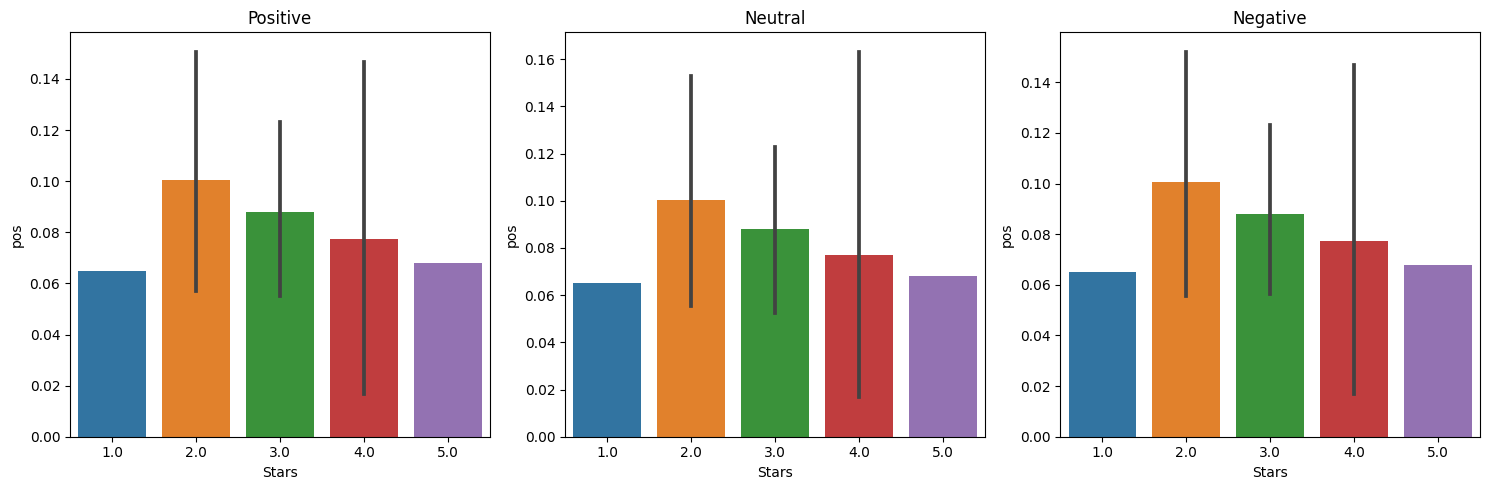

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[1])
sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
#download weights for pretrained Roberta Model

MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(ex)
sia.polarity_scores(ex)

This is not a good product! As usual with as-seen-on-tv garbage, overpriced and under-performing. But I believe in specifics when I review something so let’s get to it. I purchased this as a skeptic but, since I had soooooo much yard to regrow, I decided to give it a try. I figured if it worked, awesome! And, if it didn't I would waste $25 and then move on to more expensive or involved methods. Now, I followed the directions to the letter and within the week (I sprayed on Sunday and began to see results on Wednesday) there was, in-deed, grass growing on my formerly barren yard. However, this product is far from the miracle it espouses itself to be. Here are some specific thoughts...Calling this product a “Mousse” is just inaccurate. It doesn't create any kind of "stick anywhere gel". I have a mostly flat yard, so this was not an issue for me. But, the little slope I have in the corner saw a flow of blue/green liquid streaming down.The little vial of liquid featured in the commercial se

{'neg': 0.029, 'neu': 0.886, 'pos': 0.085, 'compound': 0.9925}

In [ ]:
encoded_text = tokenizer(ex, return_tensors='pt')
print(encoded_text)

{'input_ids': tensor([[    0,   713,    16,    45,    10,   205,  1152,   328,   287,  4505,
            19,    25,    12, 24196,    12,   261,    12, 18724, 11671,     6,
            81, 18288,     8,   223,    12, 12955,     4,   125,    38,   679,
            11, 16047,    77,    38,  1551,   402,    98,   905,    17,    27,
            29,   120,     7,    24,     4,    38,  3584,    42,    25,    10,
         42386,   636,    53,     6,   187,    38,    56,    98, 40386,   139,
           203,  6993,     7,  6701,  4610,     6,    38,  1276,     7,   492,
            24,    10,   860,     4,    38, 11464,   114,    24,  1006,     6,
          6344,   328,   178,     6,   114,    24,   399,    75,    38,    74,
          3844,    68,  1244,     8,   172,   517,    15,     7,    55,  3214,
            50,   963,  6448,     4,   978,     6,    38,  1432,     5,  9969,
             7,     5,  1601,     8,   624,     5,   186,    36,   100, 26998,
            15,   395,     8,   880,  

In [ ]:
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'r_neg': scores[0],
    'r_neu': scores[1],
    'r_pos': scores[2]
}

print(scores_dict)

RuntimeError: ignored

In [ ]:
def polarity_scores_roberta(ex):
  encoded_text = tokenizer(ex, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'r_neg': scores[0],
      'r_neu': scores[1],
      'r_pos': scores[2]
  }
  return scores_dict

In [ ]:
res = {}
for i, row in tqdm(lawn.iterrows(), total=len(lawn)):
  try:
    text = row['Reviews']
    stars = row['Stars']
    id = row['ID']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}

    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)

    both = {**vader_result_rename, **roberta_result}
    res[id] = both

  except RuntimeError:
    print(f'Broke for id {id}')

  0%|          | 0/50 [00:00<?, ?it/s]

Broke for id 2


In [ ]:
res

{1: {'vader_neg': 0.038,
  'vader_neu': 0.874,
  'vader_pos': 0.088,
  'vader_compound': 0.9115,
  'r_neg': 0.09925086,
  'r_neu': 0.48753992,
  'r_pos': 0.41320917},
 3: {'vader_neg': 0.095,
  'vader_neu': 0.854,
  'vader_pos': 0.051,
  'vader_compound': -0.9545,
  'r_neg': 0.56450576,
  'r_neu': 0.34206522,
  'r_pos': 0.09342904},
 4: {'vader_neg': 0.044,
  'vader_neu': 0.876,
  'vader_pos': 0.081,
  'vader_compound': 0.8765,
  'r_neg': 0.23039317,
  'r_neu': 0.60147333,
  'r_pos': 0.16813344},
 5: {'vader_neg': 0.096,
  'vader_neu': 0.804,
  'vader_pos': 0.1,
  'vader_compound': 0.3459,
  'r_neg': 0.92543906,
  'r_neu': 0.06763789,
  'r_pos': 0.0069231186},
 6: {'vader_neg': 0.21,
  'vader_neu': 0.58,
  'vader_pos': 0.21,
  'vader_compound': 0.0,
  'r_neg': 0.024907984,
  'r_neu': 0.3179682,
  'r_pos': 0.6571238},
 7: {'vader_neg': 0.022,
  'vader_neu': 0.914,
  'vader_pos': 0.064,
  'vader_compound': 0.9231,
  'r_neg': 0.10752,
  'r_neu': 0.5145445,
  'r_pos': 0.3779356},
 8: {'vad

In [ ]:
lawn_results = pd.DataFrame(res).T
lawn_results = lawn_results.reset_index().rename(columns={'index':'ID'})
lawn_results = lawn_results.merge(lawn, how='left')

In [ ]:
lawn_results.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,r_neg,r_neu,r_pos,Reviews,Stars
0,1,0.038,0.874,0.088,0.9115,0.099251,0.487540,0.413209,So here’s my experience.1. I followed the dire...,3.0
1,3,0.095,0.854,0.051,-0.9545,0.564506,0.342065,0.093429,"So, I bought this based on the videos that the...",2.0
2,4,0.044,0.876,0.081,0.8765,0.230393,0.601473,0.168133,Purchased for Central Florida in JuneIt has be...,3.0
3,5,0.096,0.804,0.100,0.3459,0.925439,0.067638,0.006923,I was not very happy with this product. You wi...,3.0
4,6,0.210,0.580,0.210,0.0000,0.024908,0.317968,0.657124,Cheap grass seed and is weak good for a last fill,3.0


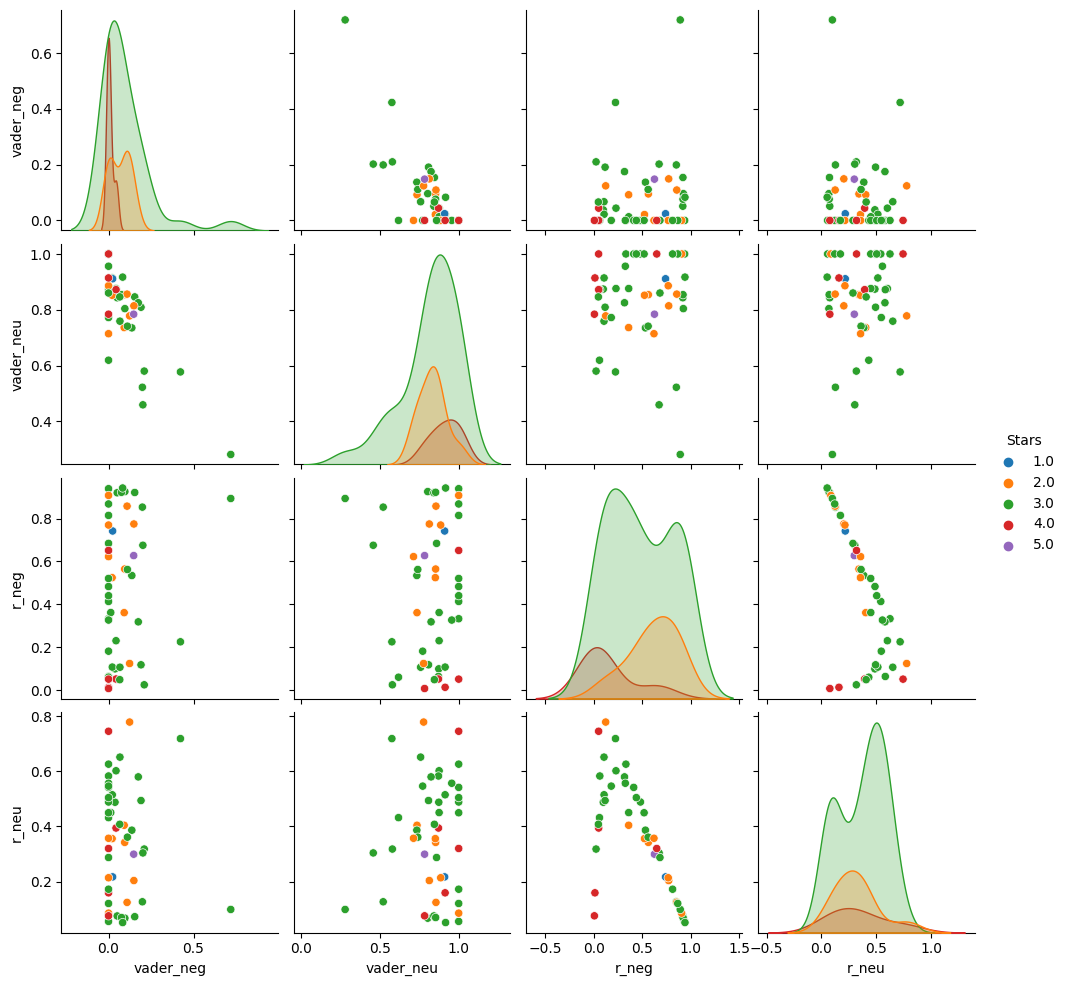

In [ ]:
#compare results using models
sns.pairplot(data=lawn_results, vars=['vader_neg', 'vader_neu', 'r_neg', 'r_neu'], hue='Stars', palette='tab10')
plt.show()